This notebook is for testing the inference algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io


%matplotlib inline

In [3]:
import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)

import ssm
from ssm.util import find_permutation
from ssm.plots import gradient_cmap, white_to_color_cmap

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names = [
    "windows blue",
    "red",
    "amber",
    "faded green",
    "dusty purple",
    "orange"
    ]

colors = sns.xkcd_palette(color_names)
cmap = gradient_cmap(colors)


# Speficy whether or not to save figures
save_figures = True

In [3]:
def generate_switch_world(prob, ntrials):
    '''
    Generate a world with defined number of trials
    ntrials: an array of num trials in each block
    prob: probability of reward in each block
    '''
    assert len(prob) == len(ntrials)
    targets = []
    truestates = []
    for i in range(len(prob)):
        probi = prob[i]
        ntrialsi = ntrials[i]
        truestate_i = [probi] * ntrialsi
        targets += list(np.random.rand(ntrialsi) < probi)
        truestates += list(truestate_i)
        
    
    return np.array(truestates), np.array(targets)[:,None]
    
def logistic(x):
    return 1 / (1 + np.exp(-x))

def logit(x):
    return np.log(x / (1-x))
    

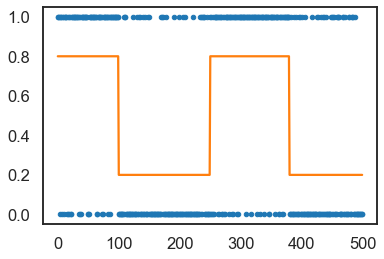

In [4]:
np.random.seed(100)
truestates, obs = generate_switch_world([0.8, 0.2, 0.8, 0.2], [100, 150, 130, 120])
plt.figure()
plt.plot(obs, '.')
plt.plot(truestates)

In [5]:
# HMM simulations
# Set the parameters of the HMM
time_bins = 1000   # number of time bins
num_states = 2    # number of discrete states
obs_dim = 1      # dimensionality of observation

# Make an HMM
np.random.seed(100)
true_hmm = ssm.HMM(num_states, obs_dim, observations="bernoulli")

# Manually tweak the means to make them farther apart
#thetas = np.linspace(0, 2 * np.pi, num_states, endpoint=False)
#true_hmm.observations.mus = 3 * np.column_stack((np.cos(thetas), np.sin(thetas)))

In [6]:
probs = np.array([[0.8], [0.2]])
true_hmm.observations.logit_ps = logit(probs)

In [7]:
logit(probs)

array([[ 1.38629436],
       [-1.38629436]])

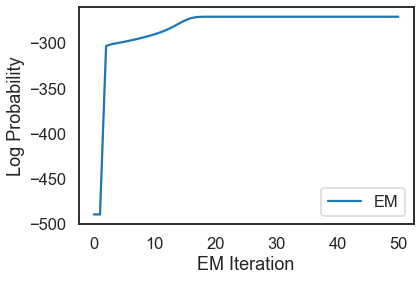

In [8]:
# Fit to observed data
data = obs # Treat observations generated above as synthetic data.
N_iters = 50
num_states = 2
obs_dim = 1

## testing the constrained transitions class
hmm = ssm.HMM(num_states, obs_dim, observations="bernoulli")
probs = np.array([[0.8], [0.2]])
hmm.observations.logit_ps = logit(probs)

hmm_lls = hmm.fit(obs, method="em", num_iters=N_iters, init_method="kmeans")

plt.figure()
plt.plot(hmm_lls, label="EM")
# plt.plot([0, N_iters], true_ll * np.ones(2), ':k', label="True")
plt.xlabel("EM Iteration")
plt.ylabel("Log Probability")
plt.legend(loc="lower right")
plt.show()

In [9]:
hmm.observations.logit_ps

array([[-1.26192859],
       [ 1.39041618]])

In [10]:
true_hmm.transitions.transition_matrix = np.array([[0.95, 0.05], [0.05, 0.95]])


AttributeError: can't set attribute

In [11]:
true_hmm.observations.params = np.array([[0.0], [1]])

In [12]:
# Sample some data from the HMM
true_states, obs = true_hmm.sample(time_bins)
true_ll = true_hmm.log_probability(obs)

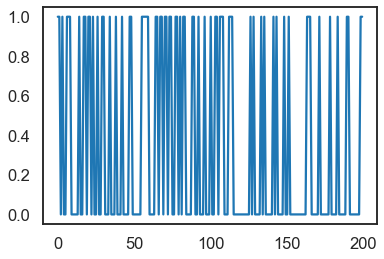

In [13]:
plt.plot(obs[200:400])

In [14]:
# Plot the data and the smoothed data
#lim = 1.05 * abs(obs).max()
plt.figure(figsize=(8, 6))
plt.imshow(true_states[None,:],
           aspect="auto",
           cmap=cmap,
           vmin=0,
           vmax=len(colors)-1,
           extent=(0, time_bins, -lim, (obs_dim)*lim))

Ey = true_hmm.observations.params[true_states]
plt.plot(obs, '-k')
plt.plot(Ey, ':k')
plt.xlim([0, 300])

# plt.xlim(0, time_bins)
# plt.xlabel("time")
# plt.yticks(lim * np.arange(obs_dim), ["$x_{}$".format(d+1) for d in range(obs_dim)])

# plt.title("Simulated data from an HMM")

# plt.tight_layout()

# if save_figures:
#     plt.savefig("hmm_2.pdf")

NameError: name 'lim' is not defined

<Figure size 576x432 with 0 Axes>

In [ ]:
obs.shape

In [ ]:
ssm.HMM??

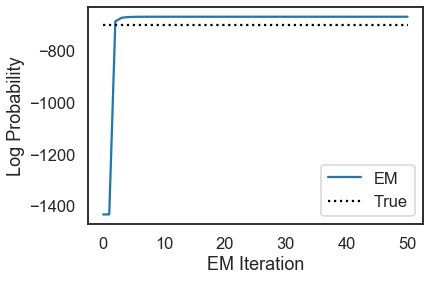

In [15]:
# Fit to observed data
data = obs # Treat observations generated above as synthetic data.
N_iters = 50
num_states = 2
obs_dim = 1

## testing the constrained transitions class
hmm = ssm.HMM(num_states, obs_dim, observations="bernoulli")

hmm_lls = hmm.fit(obs, method="em", num_iters=N_iters, init_method="kmeans")

plt.plot(hmm_lls, label="EM")
plt.plot([0, N_iters], true_ll * np.ones(2), ':k', label="True")
plt.xlabel("EM Iteration")
plt.ylabel("Log Probability")
plt.legend(loc="lower right")
plt.show()

In [16]:
obs

array([[ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

In [17]:
a,b,c= hmm.expected_states(data)
ss = hmm.most_likely_states(data)

In [18]:
1 / (1 + np.exp(hmm.observations.logit_ps))

array([[0.12213607],
       [0.86737653]])

In [19]:
s = hmm.smooth(data)

In [20]:
hmm.observations.params

array([[ 1.97235589],
       [-1.87795909]])

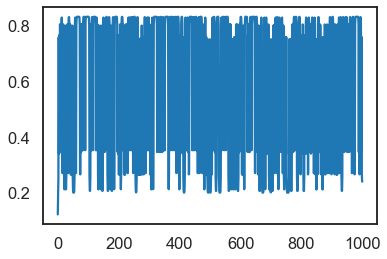

In [21]:
plt.figure()
plt.plot(s)

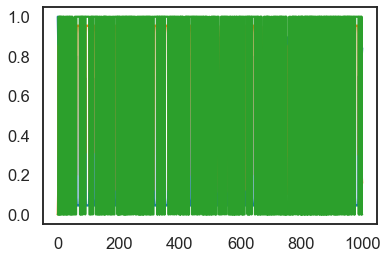

In [22]:
plt.figure()
plt.plot(a)
plt.plot(ss)
plt.show()


In [23]:
data.shape

(1000, 1)

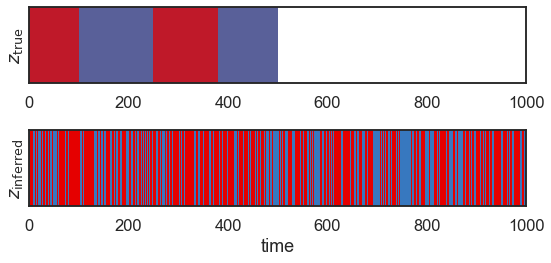

In [24]:
# Plot the true and inferred discrete states
hmm_z = hmm.most_likely_states(data)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.imshow(truestates[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
plt.xlim(0, time_bins)
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])

plt.subplot(212)
plt.imshow(hmm_z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
plt.xlim(0, time_bins)
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

plt.tight_layout()

In [4]:
# Load example e54 choices
folder = '/Users/minhnhatle/Documents/ExternalCode/rigbox_analysis'
filename = 'e54choices_051721.mat'
data = scipy.io.loadmat(folder + '/' + filename)

In [5]:
choices = data['choices']

In [6]:
choices[choices == 0] = -1
choices = choices.T

In [9]:
data

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [

In [11]:
data.shape

(489, 1)

NameError: name 'true_ll' is not defined

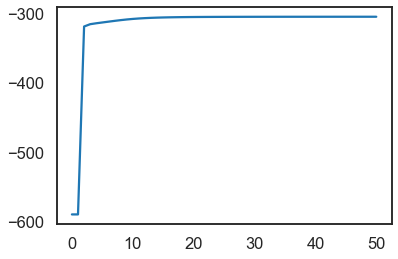

In [8]:
# Fit to observed data
data = (choices + 1) / 2 # Treat observations generated above as synthetic data.
data = data.astype('bool')
N_iters = 50
num_states = 2
obs_dim = 1

## testing the constrained transitions class
hmm = ssm.HMM(num_states, obs_dim, observations="bernoulli")

hmm_lls = hmm.fit(data, method="em", num_iters=N_iters, init_method="kmeans")

plt.plot(hmm_lls, label="EM")
plt.plot([0, N_iters], true_ll * np.ones(2), ':k', label="True")
plt.xlabel("EM Iteration")
plt.ylabel("Log Probability")
plt.legend(loc="lower right")
plt.show()

In [29]:
data.astype('bool')

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [

In [30]:
hmm.log_likelihood(data)

-304.7432483880982

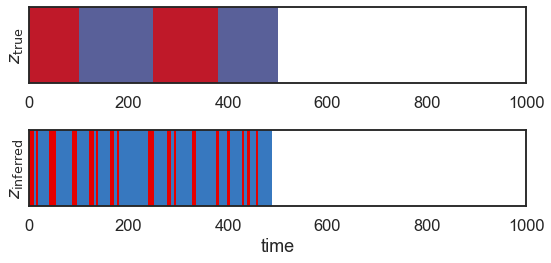

In [35]:
# Plot the true and inferred discrete states
hmm_z = hmm.most_likely_states(data)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.imshow(truestates[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
plt.xlim(0, time_bins)
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])

plt.subplot(212)
plt.imshow(hmm_z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
plt.xlim(0, time_bins)
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

plt.tight_layout()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(hmm_z)